This script investigates the influence of different audio data representations in dimensionality reduction and clustering on a dataset of goose vocalizations.

In [15]:
import glob
import librosa
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

In [10]:
DATAPATH = "/Users/lenagies/Desktop/Master/Thesis/geese/data/clips_from_selections"
track_paths = glob.glob(DATAPATH+"/*.wav")

In [5]:
len(track_paths)

7389

Inspect single call

In [92]:
i = 1300
n_fft = 512

In [93]:
call, sr = librosa.load(track_paths[i], sr=None)

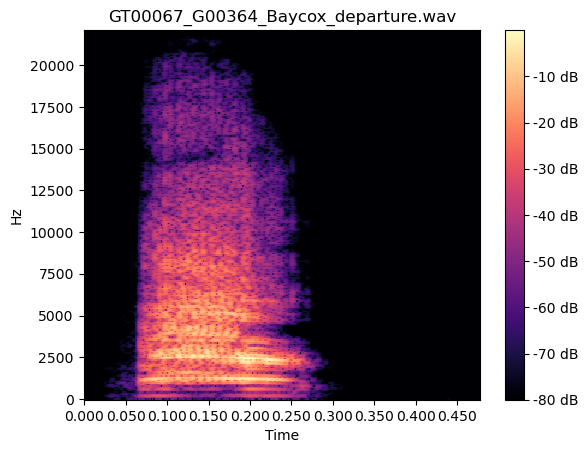

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(call, n_fft=n_fft, hop_length=(n_fft//9))), ref=np.max), sr=sr, hop_length=(n_fft//9), x_axis='time', y_axis='linear', ax=ax)
ax.set(title=track_paths[i].split("/")[-1])
fig.colorbar(img, ax=ax, format="%+2.f dB")

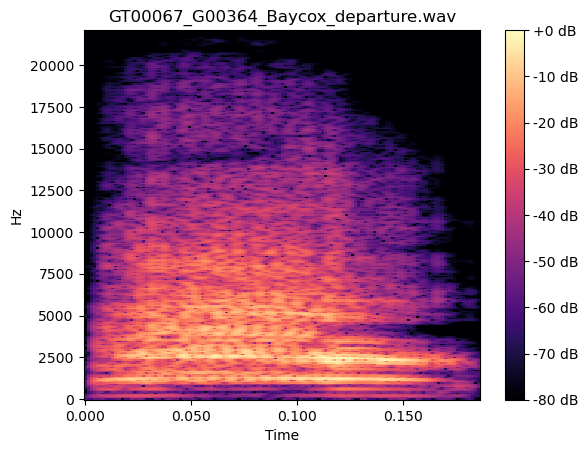

In [ ]:
# trim trailing silences using db threshold, discard second entry, that holds indices
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.trim(call, top_db=40, frame_length=n_fft, hop_length=(n_fft//8))[0], n_fft=n_fft, hop_length=(n_fft//8))), ref=np.max), sr=sr, hop_length=(n_fft//9), x_axis='time', y_axis='linear', ax=ax)
ax.set(title=track_paths[i].split("/")[-1])
fig.colorbar(img, ax=ax, format="%+2.f dB")

min max normalization: 
$X = \frac{X_{max} - X_{min}}{X - X_{min}}$

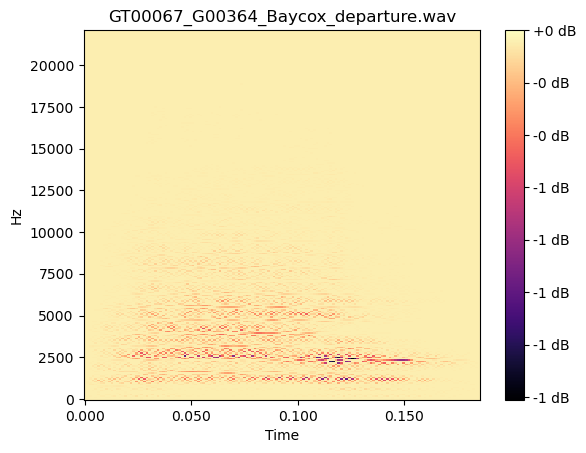

In [ ]:
def normalize(Spectrogram, min_db):
    # Normalizes Spectrogram to values between 0 and 1
    # Reference: Tim Sainburg (workshop - how to quote?) #TODO
    return np.clip((Spectrogram - min_db) / -min_db, 0, 1)

trimmed_call = librosa.effects.trim(call, top_db=40, frame_length=n_fft, hop_length=(n_fft//8))[0]
normalized_call = normalize(librosa.stft(trimmed_call, n_fft=n_fft, hop_length=(n_fft//9)), -80)
db_values = librosa.amplitude_to_db(np.abs(normalized_call), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(db_values, sr=sr, hop_length=(n_fft//9), x_axis='time', y_axis='linear', ax=ax)
ax.set(title=track_paths[i].split("/")[-1])
fig.colorbar(img, ax=ax, format="%+2.f dB")

Read sound files into dataframe and preprocess inside loop:
- Trim silences
- Normalize

Zero pad log-rescaled calls